
# Pizza Data Analysis

### I am in charge of ordering pizza for the Computation and Language Lab. One of my perpetual conundrums is deciding how much pizza to order. It has occurred to me that this is an excellent learning problem that I might automate in order to give myself some ***peace*** of mind... (and a piece of pizza!)


<img src="http://www.popuppizzalv.com/wp-content/uploads/well-balanced-diet.jpg" width=400>

In this Jupyter Notebook we will be generating some data for this problem, and attempting to solve various issues that occur in this perpetual problem. We will apply data techniques, some machine learning, and may expand into deep learning for recognizing pizza images. We will be using **numpy, pandas, scikit**, **matplotlib** and...

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
% matplotlib inline


In [128]:
#number of datapoints we want (the shape of our data)
size = 500

#we are feeding between 1 and 30 people (this is arbitrary)
ppl = np.random.randint(low=1,high=30, size=[size,1])
p = pd.DataFrame(data=ppl,columns=["People"])

#generate rough random data for number of pizzas ordered for number of people
p['Pizzas']=pd.Series(np.ceil((p["People"]/(np.random.randint(low=3,high=8, size=[size])))))
p['RSVP']=pd.Series(np.ceil((p["People"]+np.random.randint(low=-4,high=4,size=[size]))))
p.describe()


,People,Pizzas,RSVP
count,500.000000,500.000000,500.000000
mean,14.890000,3.632000,14.316000
std,8.363839,2.133936,8.583677
min,1.000000,1.000000,-3.000000
25%,8.000000,2.000000,7.000000
50%,15.000000,3.000000,14.000000
75%,22.000000,5.000000,22.000000
max,29.000000,10.000000,32.000000


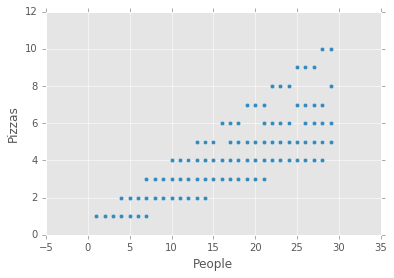

In [103]:
# we can quickly guage our data with a simple scatter plot
p.plot(x='People',y='Pizzas',kind='scatter')


Our data makes sense. Pizzas are ordered whole, so it makes sense that we have a very "steplike" plot. Presumably, people are also whole. So we don't have continuous data! We can see that we have wide ranges of people for a single value for number of pizzas. This is basically suggesting that we have high variance in the amount that people eat at any given timepoint. But, as predicted, we have a clear linear relationship between people and pizzas ordered.

Now what if we want to know how our pizza ordering stacks up given the number of people who RSVP? Do we need to do any kind of prediction, given that way less or way more people RSVP than actually show up?

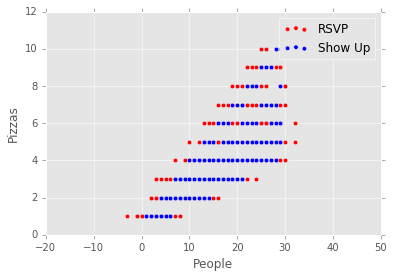

In [130]:

ax = p.plot.scatter(x='RSVP', y='Pizzas', color='red', label='RSVP')
ax.set_xlim([-20,50])

p.plot.scatter(x='People', y='Pizzas', color='blue',label='Show Up', ax=ax)

According to this randomized data, the people who RSVP more or less show up (you can tell because of the massive overlap between the groups). The red points on the left or the right of the actual ShowUps indicate how "off" the RSVP headcount was. You can see that it isn't too bad, though we will conduct some data analysis to tell us more. Additionally, we can play with our random data to see what it would look like if the RSVP mechanism was absolutely bonkers:

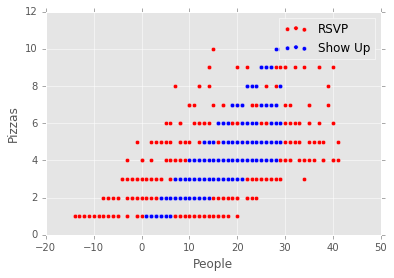

In [131]:
p['crapRSVP']=pd.Series(np.ceil((p["People"]+np.random.randint(low=-15,high=15,size=[size]))))

ax = p.plot.scatter(x='crapRSVP', y='Pizzas', color='red', label='RSVP')
p.plot.scatter(x='People', y='Pizzas', color='blue',label='Show Up', ax=ax)

Compare this plot with the one above (which uses the same x and y scale for comparison). We can see that if people are really crappy at saying if they are going to show up, we get a hugely wide mess of red where people aren't actually showing up, or tons of people are showing up unannounced. The red indicates how much more or less pizza you have ordered given your RSVPs that is appropriate for the people who Showed Up.

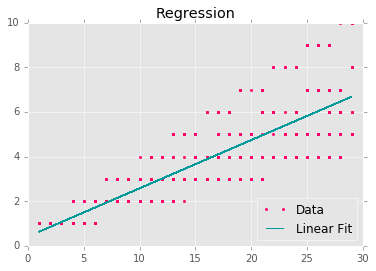

In [211]:

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from matplotlib.collections import LineCollection
from sklearn.utils import check_random_state

n = 100
x = p.People
rs = check_random_state(0)
y =p.Pizzas


lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression



fig = plt.figure()
plt.plot(x,y, '.',color='#FF0066', markersize=5)
plt.plot(x, lr.predict(x[:, np.newaxis]), '-',color="#009999")

plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Regression')
plt.colormaps()
plt.show()


From linear regression, we see that it might actually be pretty hard to get your pizza order spot on, given this data. I personally would predict that the data would begin to tighten given the same group of people at the same type of event (people don't vary their eating habits too intensely). So if you are predicting for a weekly meeting with the same people in attendance, your linear model may fit ***much*** tighter, because the ***data is tighter***. Considering that linear regression **literally minimizes prediction error**, this makes total sense. It might look something like this:

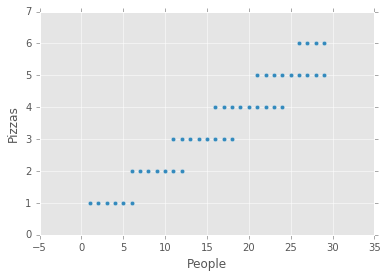

In [227]:
size = 500

#we are feeding between 1 and 30 people (this is arbitrary)
ppl_tight = np.random.randint(low=1,high=30, size=[size,1])
p_tight = pd.DataFrame(data=ppl_tight,columns=["People"])

#generate rough random data for number of pizzas ordered for number of people
p_tight['Pizzas']=pd.Series(np.ceil((p_tight["People"]/(np.random.randint(low=5,high=7, size=[size])))))
p_tight['RSVP']=pd.Series(np.ceil((p_tight["People"]+np.random.randint(low=-2,high=2,size=[size]))))
p_tight.plot(x='People',y='Pizzas',kind='scatter')

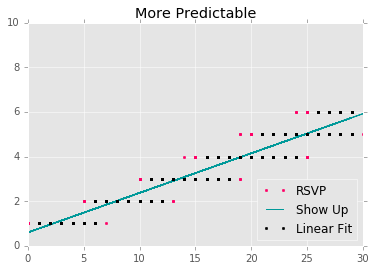

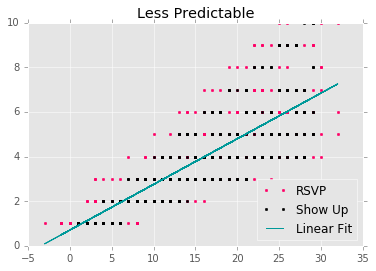

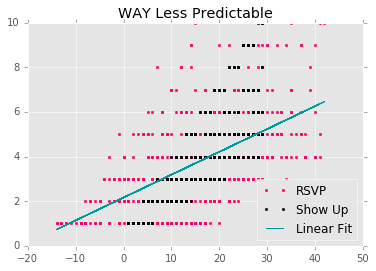

In [249]:
n = 100
rs = check_random_state(0)


# Let's work with the dataframe where there is less variance in how much people are eating, and how many people are RSVPing.
x = p_tight.RSVP
y =p_tight.Pizzas
z =p_tight.People


lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression



fig = plt.figure()
plt.plot(x,y, '.',color='#FF0066', markersize=5)
plt.plot(x, lr.predict(x[:, np.newaxis]), '-',color="#009999")
plt.plot(z,y,'.',color='black',markersize=5)
plt.legend(('RSVP','Show Up', 'Linear Fit'), loc='lower right')
plt.title('More Predictable')
plt.colormaps()
plt.ylim([0,10])
plt.xlim([0,30])
plt.show()


#let's compare to our original data again, where there is a lot more variance in how much people are eating, and how many people are RSVPing.
x = p.RSVP
y = p.Pizzas
z = p.People

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

fig = plt.figure()
plt.plot(x,y, '.',color='#FF0066', markersize=5)
plt.plot(z,y,'.',color='black',markersize=5)
plt.plot(x, lr.predict(x[:, np.newaxis]), '-',color="#009999")

plt.legend(('RSVP','Show Up', 'Linear Fit'), loc='lower right')
plt.title('Less Predictable')
plt.colormaps()
plt.show()

#let's look at that REALLY crappy RSVP data
x = p.crapRSVP
y = p.Pizzas
z = p.People

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

fig = plt.figure()
plt.plot(x,y, '.',color='#FF0066', markersize=5)
plt.plot(z,y,'.',color='black',markersize=5)
plt.plot(x, lr.predict(x[:, np.newaxis]), '-',color="#009999")

plt.legend(('RSVP','Show Up', 'Linear Fit'), loc='lower right')
plt.title('WAY Less Predictable')
plt.colormaps()
plt.show()



You can see how the circumstances of your event might change how well a linear regression would work for you as a good predictor. In fact, you might even be able to stop here if you are always ordering for the same meeting with the same people, and the data is pretty stable. You can just plug and play like so:

In [256]:
x = p_tight.RSVP
y =p_tight.Pizzas
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

#how many people RSVPed? plug that in to a linear prediction from your fitted model
rsvpers = 10
#I am using "round" instead of "ceil" because it doesn't seem right to order 3 pizzas if your prediction is 2.1.
#But if you are nervous, go with ceil! You're bound to have leftovers! 
#Or use some combo where you order a small pizza if you are around .5 above a whole number
print(np.round(lr.predict(rsvpers)))

[ 2.]


Given 10 RSVPers in your very predictable meeting, order 2 pizzas, and you'll be all good! For reference, that means that maybe 8-12 people will show up, and everyone gets about 20% of the pizza-- that seems reasonable, depending on your typical eaters! Remember, this is just simulated data. You will collect your OWN data to see the real patterns in your group's pizza eating.

But we don't care too much about easy tasks like this, do we? It's a nice automation so you don't have to fret too much about your pizza order, but we like BIG data! With complicated techniques! Predicting things we couldn't predict with just a little bit of common sense. So let's delve in.
